In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from io import StringIO
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import os

plt.style.use('bmh')

In [2]:
data=pd.read_csv(r'C:\Users\My PC\Downloads\sales_data.csv')

In [3]:
data.head()

,Month-Year,Total Sales
0,10-01-2010,3168.598
1,11-01-2010,3526.591
2,12-01-2010,3180.891
3,01-01-2011,3252.221
4,02-01-2011,3611.003


In [4]:
data.tail()

,Month-Year,Total Sales
105,07-01-2019,8591.19084
106,08-01-2019,8474.00037
107,09-01-2019,9386.80260
108,10-01-2019,9560.39945
109,11-01-2019,10834.29480


In [5]:
data.shape

(110, 2)

In [6]:
dates=pd.date_range(start='2010-01-01',freq='MS',periods=len(data))

In [7]:
dates

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01'],
              dtype='datetime64[ns]', length=110, freq='MS')

In [8]:
data["Month"]=dates.month
data.head()

,Month-Year,Total Sales,Month
0,10-01-2010,3168.598,1
1,11-01-2010,3526.591,2
2,12-01-2010,3180.891,3
3,01-01-2011,3252.221,4
4,02-01-2011,3611.003,5


In [9]:
data["Year"]=dates.year
data.head()

,Month-Year,Total Sales,Month,Year
0,10-01-2010,3168.598,1,2010
1,11-01-2010,3526.591,2,2010
2,12-01-2010,3180.891,3,2010
3,01-01-2011,3252.221,4,2010
4,02-01-2011,3611.003,5,2010


In [10]:
import calendar
data["Month"]=data["Month"].apply(lambda x: calendar.month_abbr[x])
data.head()

,Month-Year,Total Sales,Month,Year
0,10-01-2010,3168.598,Jan,2010
1,11-01-2010,3526.591,Feb,2010
2,12-01-2010,3180.891,Mar,2010
3,01-01-2011,3252.221,Apr,2010
4,02-01-2011,3611.003,May,2010


In [11]:
data.drop(["Month-Year"],axis=1,inplace=True)

In [12]:
data.head()

,Total Sales,Month,Year
0,3168.598,Jan,2010
1,3526.591,Feb,2010
2,3180.891,Mar,2010
3,3252.221,Apr,2010
4,3611.003,May,2010


In [14]:
data.rename(columns={"Total Sales":"Sale"},inplace=True)
data.head()

,Sale,Month,Year
0,3168.598,Jan,2010
1,3526.591,Feb,2010
2,3180.891,Mar,2010
3,3252.221,Apr,2010
4,3611.003,May,2010


In [15]:
data.set_index(dates,inplace=True)

In [16]:
data.head()

,Sale,Month,Year
2010-01-01,3168.598,Jan,2010
2010-02-01,3526.591,Feb,2010
2010-03-01,3180.891,Mar,2010
2010-04-01,3252.221,Apr,2010
2010-05-01,3611.003,May,2010


In [17]:
df=data.copy()

In [18]:
df.drop(["Month","Year"],axis=1,inplace=True)

In [19]:
df.head()

,Sale
2010-01-01,3168.598
2010-02-01,3526.591
2010-03-01,3180.891
2010-04-01,3252.221
2010-05-01,3611.003


In [20]:
from datetime import datetime

C:\Users\My PC\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


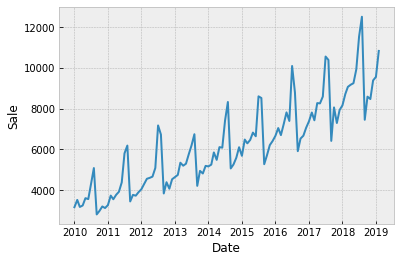

In [21]:
plt.xlabel("Date")
plt.ylabel("Sale")
plt.plot(df)

In [22]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean,rolstd)

                   Sale
2010-01-01          NaN
2010-02-01          NaN
2010-03-01          NaN
2010-04-01          NaN
2010-05-01          NaN
2010-06-01          NaN
2010-07-01          NaN
2010-08-01          NaN
2010-09-01          NaN
2010-10-01          NaN
2010-11-01          NaN
2010-12-01  3486.047333
2011-01-01  3494.541083
2011-02-01  3512.146068
2011-03-01  3543.636493
2011-04-01  3587.384887
2011-05-01  3613.508838
2011-06-01  3681.897332
2011-07-01  3807.245513
2011-08-01  3899.223237
2011-09-01  3952.251319
2011-10-01  4017.792641
2011-11-01  4061.919549
2011-12-01  4126.737959
2012-01-01  4191.668304
2012-02-01  4239.811196
2012-03-01  4323.428568
2012-04-01  4392.716926
2012-05-01  4454.663665
2012-06-01  4513.606209
...                 ...
2016-09-01  7170.504668
2016-10-01  7238.853796
2016-11-01  7277.287673
2016-12-01  7331.643623
2017-01-01  7391.282418
2017-02-01  7454.837822
2017-03-01  7515.418955
2017-04-01  7600.763089
2017-05-01  7637.488773
2017-06-01  7737

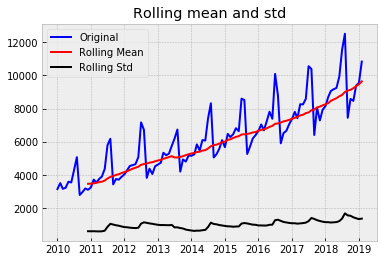

In [23]:
orig=plt.plot(df,color="blue",label="Original")
mean=plt.plot(rolmean,color="red",label="Rolling Mean")
std=plt.plot(rolstd,color="black",label="Rolling Std")
plt.legend(loc="best")
plt.title("Rolling mean and std")
plt.show()

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

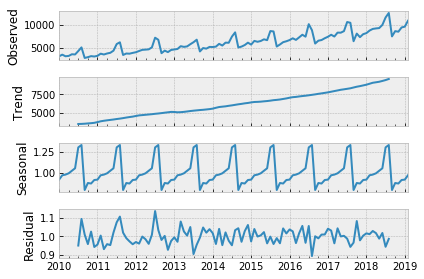

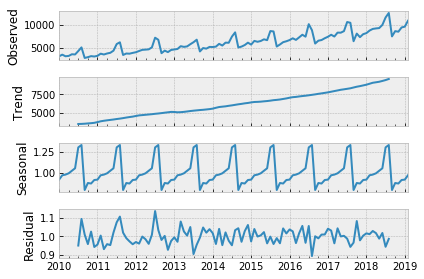

In [25]:
ts_decompose=seasonal_decompose(df,model="multiplicative",freq=12)
ts_decompose.plot()

C:\Users\My PC\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


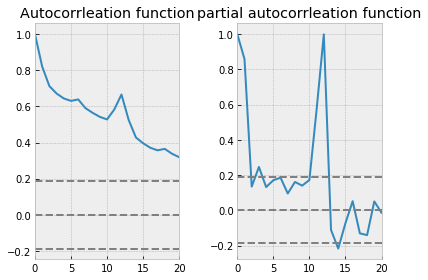

In [26]:
#plot ACF and PACF
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf( df, nlags=20)
lag_pacf=pacf( df,nlags=20,method="ols")

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.title("Autocorrleation function")
plt.xlim([0,20])


#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle="--",color="gray")
plt.title("partial autocorrleation function")
plt.xlim([0,20])
plt.tight_layout()

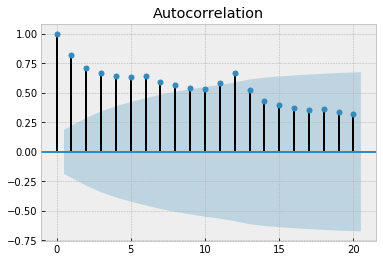

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_plot=plot_acf(df,lags=20)

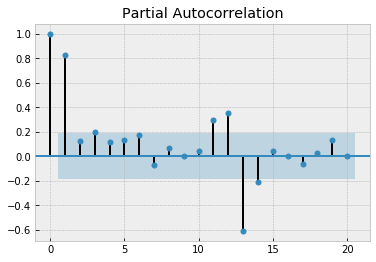

In [28]:
pacf_plot=plot_pacf(df,lags=20)

In [29]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [30]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
            continue

In [31]:
print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 866.0020134153359 for model SARIMAX(3, 1, 1)x(3, 1, 1, 12)


In [32]:
SARIMAX_model[AIC.index(min(AIC))][0]

(3, 1, 1)

In [33]:
SARIMAX_model[AIC.index(min(AIC))][1]

(3, 1, 1, 12)

In [34]:
mod=sm.tsa.statespace.SARIMAX(df,
                             order=SARIMAX_model[AIC.index(min(AIC))][0],
                             seasonal_order=SARIMAX_model[AIC.index(min(AIC))][1],
                             eforce_stationarity=False,
                             enforce_invertibility=False)
results=mod.fit()

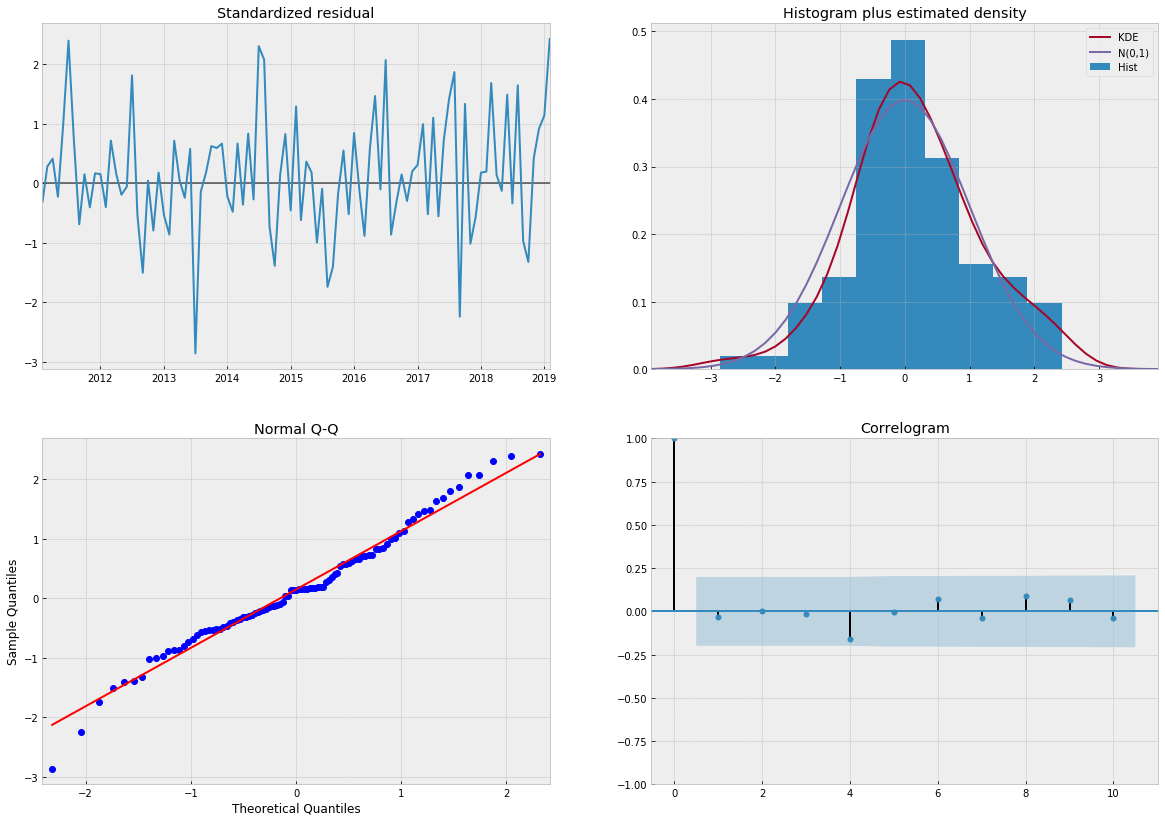

In [35]:
results.plot_diagnostics(figsize=(20,14))
plt.show()

In [36]:
df.tail()

,Sale
2018-10-01,8591.19084
2018-11-01,8474.00037
2018-12-01,9386.80260
2019-01-01,9560.39945
2019-02-01,10834.29480


In [37]:
df.head()

,Sale
2010-01-01,3168.598
2010-02-01,3526.591
2010-03-01,3180.891
2010-04-01,3252.221
2010-05-01,3611.003


In [38]:
pred1=results.get_prediction(start="2010-01-01",dynamic=False)
pred1_ci=pred1.conf_int()

In [44]:
pred0=results.get_prediction(start="2013-01-01",dynamic=False)
pred0_ci=pred0.conf_int()

In [48]:
pred2=results.get_prediction(start="2017-01-01",dynamic=True)
pred2_ci=pred1.conf_int()

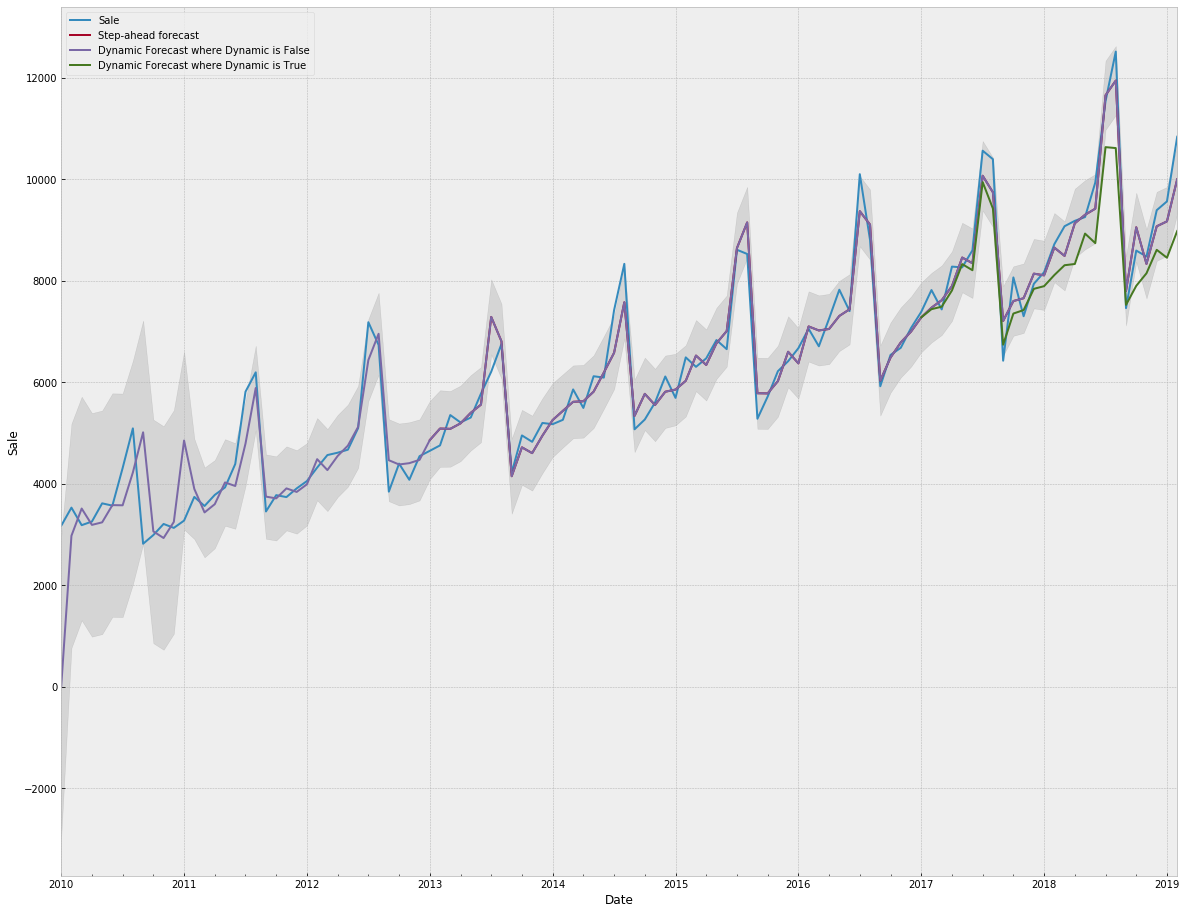

In [50]:
ax=df.plot(figsize=(20,16))
pred0.predicted_mean.plot(ax=ax,label="Step-ahead forecast")
pred1.predicted_mean.plot(ax=ax,label="Dynamic Forecast where Dynamic is False")
pred2.predicted_mean.plot(ax=ax,label="Dynamic Forecast where Dynamic is True")
ax.fill_between(pred2_ci.index,pred2_ci.iloc[:,0],pred2_ci.iloc[:,1],color='k',alpha=.1)
plt.xlabel("Date")
plt.ylabel("Sale")
plt.legend()
plt.show()